# Cleaning

**We have cleaned the following in the given dataset membership.csv :**
- Invalid dates
- Dropping duplicates
- Null or missing values
- Check for 0 or negative price values
- Remove dates in the future

**We have done the following for improved readability :**
- Rename Clients
- Rename ContactIds

**Insights**
- A person (ContactId) can be a member of two different products at the same time.

In [173]:
# Imports
import pandas as pd

# ImpexiumInsights is the membership data
df = pd.read_csv('membership.csv')

# Change clients to a more readable format as the following:
# Client_1 -> ICSC
# Client_2 -> SIOR
# Client_3 -> NAIOP
df['Client'] = df['Client'].replace('Client_1', 'ICSC')
df['Client'] = df['Client'].replace('Client_2', 'SIOR')
df['Client'] = df['Client'].replace('Client_3', 'NAIOP')
df.head(10)

,ContactId,ClientId,Client,ProductId,ProductType,EffectiveDate,ExpireDate,Total
0,0x566B63D73878FD95925F7B6716FAB095,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,9/1/21,8/31/22,104.49
1,0x77D707DC7112E8379C27E3A1AF0EC034,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,8/1/21,7/31/22,104.49
2,0xC36639462513FE7C2413AF7449B281BD,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0xCF82E756F655A4E1518567DCDB80CCBF,Membership,6/27/21,6/26/22,36.45
3,0xC36639462513FE7C2413AF7449B281BD,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,6/19/21,6/18/22,104.49
4,0xBDF36B8927A18BC973A2AE91E7F5112F,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,6/27/21,6/26/22,104.49
5,0x18CC10100F771A69BFD13098384C7E46,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,8/2/21,8/1/22,104.49
6,0x0E49629AB8D42E50157CFDE15186FD8B,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,6/29/21,6/28/22,104.49
7,0xB584C9347DE96FFE23C5BD103626F03F,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,6/28/21,6/27/22,104.49
8,0x7181625DB00B71EAA5FEB7C1632F92EB,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,6/28/21,6/27/22,104.49
9,0xD35391A8B2400414D05B610DBC052102,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,1/1/20,12/31/20,104.49


In [174]:
# Removing all entries where EffectiveDate > ExpireDate
df['EffectiveDate'] = pd.to_datetime(df['EffectiveDate'], format='%m/%d/%y')
df['ExpireDate'] = pd.to_datetime(df['ExpireDate'], format='%m/%d/%y')
valid_df = df[df['EffectiveDate'] <= df['ExpireDate']]

# Check 
invalid_df = valid_df[valid_df['EffectiveDate'] > valid_df['ExpireDate']]
print("Are there any entries in the new data frame that are invalid for dates?", not(invalid_df.to_xarray))


# Check passed so modify data frame
df = valid_df

Are there any entries in the new data frame that are invalid for dates? False


In [175]:
# Are there any prices that are 0 or negative?
invalid_rows = df[df['Total'] <= 0]

# Check
print("Are there any prices that are 0 or negative?", not(invalid_rows.to_xarray))

Are there any prices that are 0 or negative? False


In [176]:
# Can different people be members of the same ProductId at the same time?
unique_products = df.groupby('ContactId')['ProductId'].nunique()
subscriptions = unique_products[unique_products > 1]

# Check
print("Can different people be members of the same ProductId at the same time?", not(not({subscriptions.to_dict})))

Can different people be members of the same ProductId at the same time? True


In [177]:
# Before we check duplicates, check for this question:
# Can entries that have the same ContactId, ProductId, EffectiveDate, ExpireDate, have different Total values.

# Group entries by chosed columns to check for variability in Total
total_cols = df.groupby(['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])['Total'].nunique() > 1

# Create a new dataframe based on more than 1 Total values
indexes = total_cols[total_cols].index
unique_totals = df.set_index(['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])
updated_df = unique_totals.loc[indexes].reset_index()

# Check
print("Entries:")
print(updated_df)

Entries:
                              ContactId                           ProductId  \
0    0x008788A10C4D48BE2BA6B88FB1DF883C  0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44   
1    0x008788A10C4D48BE2BA6B88FB1DF883C  0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44   
2    0x008B06399E57D57AC7BDF126F9F0A3FE  0x9E8B160226C9FE22A910C782CE5076E2   
3    0x008B06399E57D57AC7BDF126F9F0A3FE  0x9E8B160226C9FE22A910C782CE5076E2   
4    0x08B59C5D8D0B6A939D86AB1DF5A50375  0x9E8B160226C9FE22A910C782CE5076E2   
..                                  ...                                 ...   
316  0xFECB0580DFD2886ECF6058CF92CAAFD5  0x9E8B160226C9FE22A910C782CE5076E2   
317  0xFECB0580DFD2886ECF6058CF92CAAFD5  0x9E8B160226C9FE22A910C782CE5076E2   
318  0xFEE01732A992D1A6ADFB98EB59ADA1A3  0x9E8B160226C9FE22A910C782CE5076E2   
319  0xFEE01732A992D1A6ADFB98EB59ADA1A3  0x9E8B160226C9FE22A910C782CE5076E2   
320  0xFEE01732A992D1A6ADFB98EB59ADA1A3  0x9E8B160226C9FE22A910C782CE5076E2   

    EffectiveDate ExpireDate              

In [178]:
# Dropping all duplicates that have the same ContactId, ProductId, EffectiveDate, and ExpireDate
df['EffectiveDate'] = pd.to_datetime(df['EffectiveDate'], format='%m/%d/%y')
df['ExpireDate'] = pd.to_datetime(df['ExpireDate'], format='%m/%d/%y')
df_unique = df.drop_duplicates(subset=['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])

# Check 
duplicates_check = df_unique.duplicated(subset=['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'], keep=False)
no_duplicates = not duplicates_check.any()
print("There are no duplicates in the new data frame, based on the specified columns above?", no_duplicates)

# Check passed so modify data frame
df = df_unique

There are no duplicates in the new data frame, based on the specified columns above? True


In [179]:
# Identifying any null or missing values
missing_entries = df[df.isnull().any(axis=1) | df.applymap(lambda x: x == '').any(axis=1)]

# Check
print("Are there any null or missing values in the data frame?", not(missing_entries.to_xarray))

Are there any null or missing values in the data frame? False


In [180]:
# Cleaning: removing all dates in the future.

# Cutoff date is May 2024
cutoff_date = pd.Timestamp('2024-05-01')
df_filtered = df[(df['EffectiveDate'] < cutoff_date) & (df['ExpireDate'] < cutoff_date)]
eff_check = df_filtered['EffectiveDate'].max()
exp_check = df_filtered['ExpireDate'].max()
print("Checks:")
print(eff_check < cutoff_date)
print(exp_check < cutoff_date)

# Check passed so modify data frame
df = df_filtered

Checks:
True
True


In [181]:
# Generate a unique "Member X" identifier for each unique ContactId
temp_df = df.copy()
unique_ids = temp_df['ContactId'].unique()
member_mapping = {id_: f"Member {i+1}" for i, id_ in enumerate(unique_ids)}
temp_df['ContactId'] = temp_df['ContactId'].map(member_mapping)

# Check
print(temp_df.head(5))

# Check passed so modify data frame
df = temp_df

  ContactId                            ClientId Client  \
0  Member 1  0xCAB892266CB7872B20CED441410BFF5E   SIOR   
1  Member 2  0xCAB892266CB7872B20CED441410BFF5E   SIOR   
2  Member 3  0xCAB892266CB7872B20CED441410BFF5E   SIOR   
3  Member 3  0xCAB892266CB7872B20CED441410BFF5E   SIOR   
4  Member 4  0xCAB892266CB7872B20CED441410BFF5E   SIOR   

                            ProductId ProductType EffectiveDate ExpireDate  \
0  0x9E8B160226C9FE22A910C782CE5076E2  Membership    2021-09-01 2022-08-31   
1  0x9E8B160226C9FE22A910C782CE5076E2  Membership    2021-08-01 2022-07-31   
2  0xCF82E756F655A4E1518567DCDB80CCBF  Membership    2021-06-27 2022-06-26   
3  0x9E8B160226C9FE22A910C782CE5076E2  Membership    2021-06-19 2022-06-18   
4  0x9E8B160226C9FE22A910C782CE5076E2  Membership    2021-06-27 2022-06-26   

    Total  
0  104.49  
1  104.49  
2   36.45  
3  104.49  
4  104.49  


In [182]:
# Saving updated data frame to the csv
# Always run this at the end of your work session:
df.to_csv('modified_membership.csv', index=False)

In [183]:
# Deep copy
df_mem = df.copy(deep=True)
df_mem.head()

,ContactId,ClientId,Client,ProductId,ProductType,EffectiveDate,ExpireDate,Total
0,Member 1,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,2021-09-01,2022-08-31,104.49
1,Member 2,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,2021-08-01,2022-07-31,104.49
2,Member 3,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0xCF82E756F655A4E1518567DCDB80CCBF,Membership,2021-06-27,2022-06-26,36.45
3,Member 3,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,2021-06-19,2022-06-18,104.49
4,Member 4,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,2021-06-27,2022-06-26,104.49


In [184]:
# Membership Ranges
# Come back to this after cleaning
# def assign_membership(total):
#     if total < 350:
#         return 'Standard'
#     elif 350 <= total < 700:
#         return 'Silver'
#     elif total >= 700:
#         return 'Gold'

# product_totals = df.copy()
# product_totals['Membership'] = product_totals['Total'].apply(assign_membership)
# product_id_to_membership = product_totals.set_index('ProductId')['Membership'].to_dict()


# df['ProductId'] = df['ProductId'].map(product_id_to_membership)

# Analysis

**Questions we looked into :**
- What is the proportion of people who renew? 
- How many times do unique contact ID’s renew their memberships?

In [185]:
# Proportion of people that renew memberships?

# Sort the DataFrame and avoid changing the original df
df_s = df.sort_values(by=['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])
df_s['EffectiveDate'] = pd.to_datetime(df_s['EffectiveDate'], format='%m/%d/%Y')
df_s['ExpireDate'] = pd.to_datetime(df_s['ExpireDate'], format='%m/%d/%Y')

# Custom function to identify renewals
def check_membership(group):
    group['Renewed'] = group['EffectiveDate'].shift(-1) > group['ExpireDate']
    return group

renewals = df_s.groupby(['ContactId', 'ProductId'], group_keys=False).apply(check_membership)
df_renewed_memberships = renewals[renewals['Renewed'] == True]
renewed_unique_contact_ids = df_renewed_memberships['ContactId'].nunique()
total_unique_contact_ids = df['ContactId'].nunique()

# Check
print("Proportion of active members: ", renewed_unique_contact_ids, "out of", total_unique_contact_ids)

Proportion of active members:  39353 out of 92829


In [186]:
# Proportion of people that renew membership based on Clients.

# Custom function to identify renewals
def calculate_renewal_rate(client_df):
    # Sort the DataFrame and avoid changing the original df
    df_s = client_df.sort_values(by=['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])
    df_s['EffectiveDate'] = pd.to_datetime(df_s['EffectiveDate'], format='%m/%d/%Y')
    df_s['ExpireDate'] = pd.to_datetime(df_s['ExpireDate'], format='%m/%d/%Y')
    
    # The actual checking logic
    renewals = df_s.groupby(['ContactId', 'ProductId'], group_keys=False).apply(check_membership)
    df_renewed_memberships = renewals[renewals['Renewed'] == True]
    renewed_unique_contact_ids = df_renewed_memberships['ContactId'].nunique()
    total_unique_contact_ids = client_df['ContactId'].nunique()
    
    # Defining ans
    # ans = "Proportion of active members: ", renewed_unique_contact_ids, "out of", total_unique_contact_ids
    return renewed_unique_contact_ids / total_unique_contact_ids if total_unique_contact_ids else 0

# Apply the custom function to each client
clients = ['ICSC', 'SIOR', 'NAIOP']

# Storing renewal rates in the dictionary
renewal_rates = {}
for client in clients:
    client_df = df[df['Client'] == client]
    renewal_rates[client] = calculate_renewal_rate(client_df)
    
print(renewal_rates)
print("Client 2, SIOR, has the highet renewals with approximately 48%")

{'ICSC': 0.18937415578568212, 'SIOR': 0.48200942292110555, 'NAIOP': 0.33996551266746255}
Client 2, SIOR, has the highet renewals with approximately 48%


In [187]:
# The most profitable Client

client_totals = df.groupby('Client')['Total'].sum()
print(client_totals)
print("The most profitable client is Client 2, SIOR, with a profit of $11,282,100")

Client
ICSC     1.755890e+06
NAIOP    4.434940e+06
SIOR     1.128186e+07
Name: Total, dtype: float64
The most profitable client is Client 2, SIOR, with a profit of $11,282,100


In [188]:
# Checking if a ProductId can belong to mutliple clients?

product_by_clients = df.groupby('ProductId')['Client'].unique()
overlap = product_by_clients[product_by_clients.apply(len) > 1]
print("Products associated with more than one client:")
print(overlap)

Products associated with more than one client:
ProductId
0x9E8B160226C9FE22A910C782CE5076E2    [SIOR, ICSC]
0xF5C0A1C9384C2E25E79BA1ABF5D9A037    [SIOR, ICSC]
Name: Client, dtype: object


In [189]:
# Find the proportion of products that have multiple 'Total' values to all products.

products_by_totals = df.groupby('ProductId')['Total'].nunique()
num_products = (products_by_totals > 1).sum()
total_products = df['ProductId'].nunique()
proportion = num_products / total_products
print("The proportion of products with multiple total values:", (num_products / total_products))

The proportion of products with multiple total values: 0.5396825396825397


In [190]:
# Finding the most profitable products? And compare the result to top products by entries.
# If the top 10 most profitable products has multiple clients, then those clients are listed.

product_by_totals = df.groupby('ProductId')['Total'].sum()
product_by_clients = df.groupby('ProductId')['Client'].unique().apply(', '.join)
product_by_count = df.groupby('ProductId').size()

# Combining products for clients
combined_df = pd.DataFrame({
    'TotalValue': product_by_totals,
    'Clients': product_by_clients,
    'EntriesCount': product_by_count
})
sorted_df = combined_df.sort_values(by='TotalValue', ascending=False)
most_profitable = sorted_df.head(10)
print("Top 10 products by total value along with their associated clients:")
print(most_profitable)

# Compare results
entries_df = pd.DataFrame({
    'EntriesCount': product_by_count
}).sort_values(by='EntriesCount', ascending=False)
most_entries = entries_df.head(5)
print("\n")
print("Top 5 products by number of entries:")
print(most_entries)

Top 10 products by total value along with their associated clients:
                                      TotalValue     Clients  EntriesCount
ProductId                                                                 
0x9E8B160226C9FE22A910C782CE5076E2  7.833360e+06  SIOR, ICSC         71388
0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44  2.797043e+06       NAIOP         16327
0xF5C0A1C9384C2E25E79BA1ABF5D9A037  2.062277e+06  SIOR, ICSC         38233
0xB1D787D73861B99E3C6EAAB152ECC267  1.073884e+06       NAIOP          3325
0x83328A9B5BCBD66B31C8B882E78C7B0F  1.046778e+06        SIOR         67665
0xBC0C8546EF1FC064C277B3CEECF1B68E  5.484348e+05        SIOR          9811
0x1F9328EF4BFD437D552C96F5B1D116EE  2.846097e+05       NAIOP          1660
0x8C19A547F4F2D76D4F47B8EFFB73F4F7  1.972465e+05        ICSC          1449
0x54F95A5E234DD10A3244A98632BA45CB  1.760362e+05        ICSC          1866
0x5158A250E30F1FB4415D86DED2C8E0C5  1.528739e+05        ICSC           499


Top 5 products by number of en

Use revenue instead of profits

In [191]:
# Getting the minimum, maximum, median, mean, and standard deviation for the top 5 products.

# Use the previous most_profitable output to filter and find statistics
filter_df = most_profitable.index[:5]
product_stats = df[df['ProductId'].isin(filter_df)]
stats_df = product_stats.groupby('ProductId')['Total'].agg(['min', 'max', 'median', 'mean', 'std'])

# Display data in descending order for Total value
ordered_df = stats_df.reindex(filter_df)
print("Statistics for top 5 products by Total:")
print(ordered_df)

# Finding the statistics for the Total column as a whole
general_stats = df['Total'].agg(['min', 'max', 'median', 'mean', 'std'])

# Displaying results
print("\n")
print("Statistics for the Total column:")
print(general_stats)

Statistics for top 5 products by Total:
                                         min       max    median        mean  \
ProductId                                                                      
0x9E8B160226C9FE22A910C782CE5076E2    0.8100   253.125  104.4900  109.729365   
0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44    9.7200   230.850  170.1000  171.313958   
0xF5C0A1C9384C2E25E79BA1ABF5D9A037   13.5027    77.760   55.8900   53.939715   
0xB1D787D73861B99E3C6EAAB152ECC267  275.4000  1069.200  319.9500  322.972701   
0x83328A9B5BCBD66B31C8B882E78C7B0F    1.4580   125.874   10.4895   15.470000   

                                          std  
ProductId                                      
0x9E8B160226C9FE22A910C782CE5076E2  23.139173  
0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44   4.524739  
0xF5C0A1C9384C2E25E79BA1ABF5D9A037   6.819395  
0xB1D787D73861B99E3C6EAAB152ECC267  16.440980  
0x83328A9B5BCBD66B31C8B882E78C7B0F  23.449220  


Statistics for the Total column:
min          0.810000
max   

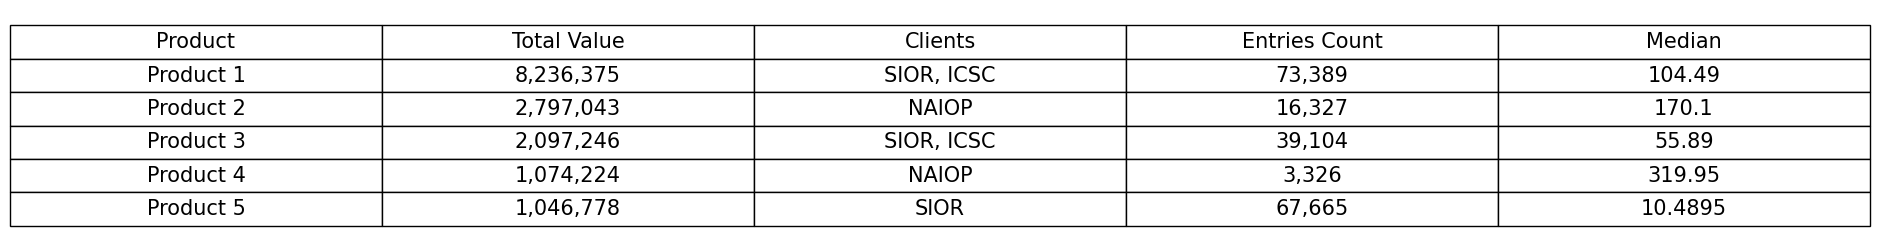

In [192]:
import matplotlib.pyplot as plt

# Manually putting in the data
table_data = [
    ["Product", "Total Value", "Clients", "Entries Count", "Median"],
    ["Product 1", "8,236,375", "SIOR, ICSC", "73,389", "104.49"],
    ["Product 2", "2,797,043", "NAIOP", "16,327", "170.1"],
    ["Product 3", "2,097,246", "SIOR, ICSC", "39,104", "55.89"],
    ["Product 4", "1,074,224", "NAIOP", "3,326", "319.95"],
    ["Product 5", "1,046,778", "SIOR", "67,665", "10.4895"]
]

# Creating the plot and axis
fig, ax = plt.subplots(figsize=(12, 3))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')

# Creating the table
table = ax.table(cellText=table_data, cellLoc='center', loc='center', colWidths=[0.2 for x in table_data[0]])
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(2, 2)
plt.show()

In [193]:
# Finding the top performing products per client

products_clients = df.groupby(['Client', 'ProductId'])['Total'].sum().reset_index()
sorted = products_clients.sort_values(['Client', 'Total'], ascending=[True, False])
profits = sorted.groupby('Client').head(10)
print(profits)

   Client                           ProductId         Total
3    ICSC  0x9E8B160226C9FE22A910C782CE5076E2  1.122092e+06
2    ICSC  0x8C19A547F4F2D76D4F47B8EFFB73F4F7  1.972465e+05
1    ICSC  0x54F95A5E234DD10A3244A98632BA45CB  1.760362e+05
0    ICSC  0x5158A250E30F1FB4415D86DED2C8E0C5  1.528739e+05
4    ICSC  0xF5C0A1C9384C2E25E79BA1ABF5D9A037  1.076415e+05
11  NAIOP  0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44  2.797043e+06
13  NAIOP  0xB1D787D73861B99E3C6EAAB152ECC267  1.073884e+06
7   NAIOP  0x1F9328EF4BFD437D552C96F5B1D116EE  2.846097e+05
14  NAIOP  0xB794B776FB974C9B09BDE6A815EFFCD8  9.956115e+04
12  NAIOP  0xA23E0E7B83DB6A0D4B958C46E70CED19  8.465310e+04
8   NAIOP  0x85705D7BF13E936A6B07F7CC0047211F  4.799736e+04
5   NAIOP  0x0BCE80143CB901200D9A331930AA0315  4.367439e+04
10  NAIOP  0x896D76C40828972B7A92CA2BDBA6BE22  3.118500e+03
6   NAIOP  0x10AB8A62F22A93DFA334BE19E73A6832  3.693600e+02
9   NAIOP  0x859F45F9B7C86C38399DA51D19C7A5F6  2.916000e+01
44   SIOR  0x9E8B160226C9FE22A910C782CE5

In [194]:
# How many unique products exist in each client?

unique_products = df.groupby('Client')['ProductId'].nunique()
print("Unique products by client:")
print(unique_products)

Unique products by client:
Client
ICSC      5
NAIOP    10
SIOR     50
Name: ProductId, dtype: int64


In [195]:
# Percentage of sales top products account for.

top_ds = {
    'ICSC': ["0x9E8B160226C9FE22A910C782CE5076E2"],
    'NAIOP': ["0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44"],
    'SIOR': ["0x9E8B160226C9FE22A910C782CE5076E2"]
}
total_sales = df.groupby('Client')['Total'].sum()

# Top 1
for client, product_ids in top_ds.items():
    totals_products = df[df['ProductId'].isin(product_ids) & (df['Client'] == client)]['Total'].sum()
    percent = (totals_products / total_sales[client]) * 100
    print(f"Client {client} - Percentage of sales by top 1 product: {percent:.2f}%")

# Top 2
top_ds['ICSC'].append("0x8C19A547F4F2D76D4F47B8EFFB73F4F7")
top_ds['NAIOP'].append("0xB1D787D73861B99E3C6EAAB152ECC267")
top_ds['SIOR'].append("0xF5C0A1C9384C2E25E79BA1ABF5D9A037")
print("\n")
for client, product_ids in top_ds.items():
    totals_products = df[df['ProductId'].isin(product_ids) & (df['Client'] == client)]['Total'].sum()
    percent = (totals_products / total_sales[client]) * 100
    print(f"Client {client} - Percentage of sales by top 2 producs: {percent:.2f}%")

# Top 3
top_ds['ICSC'].append("0x54F95A5E234DD10A3244A98632BA45CB")
top_ds['NAIOP'].append("0x1F9328EF4BFD437D552C96F5B1D116EE")
top_ds['SIOR'].append("0x83328A9B5BCBD66B31C8B882E78C7B0F")
print("\n")
for client, product_ids in top_ds.items():
    totals_products = df[df['ProductId'].isin(product_ids) & (df['Client'] == client)]['Total'].sum()
    percent = (totals_products / total_sales[client]) * 100
    print(f"Client {client} - Percentage of sales by top 3 producs: {percent:.2f}%")

# Top 4
top_ds['ICSC'].append("0x5158A250E30F1FB4415D86DED2C8E0C5")
top_ds['NAIOP'].append("0xB794B776FB974C9B09BDE6A815EFFCD8")
top_ds['SIOR'].append("0xBC0C8546EF1FC064C277B3CEECF1B68E")
print("\n")
for client, product_ids in top_ds.items():
    totals_products = df[df['ProductId'].isin(product_ids) & (df['Client'] == client)]['Total'].sum()
    percent = (totals_products / total_sales[client]) * 100
    print(f"Client {client} - Percentage of sales by top 4 producs: {percent:.2f}%")

# Top 5
top_ds['ICSC'].append("0xF5C0A1C9384C2E25E79BA1ABF5D9A037")
top_ds['NAIOP'].append("0xA23E0E7B83DB6A0D4B958C46E70CED19")
top_ds['SIOR'].append("0xD109AC74DF282488EFD1DD7621A847D2")
print("\n")
for client, product_ids in top_ds.items():
    totals_products = df[df['ProductId'].isin(product_ids) & (df['Client'] == client)]['Total'].sum()
    percent = (totals_products / total_sales[client]) * 100
    print(f"Client {client} - Percentage of sales by top 5 producs: {percent:.2f}%")

Client ICSC - Percentage of sales by top 1 product: 63.90%
Client NAIOP - Percentage of sales by top 1 product: 63.07%
Client SIOR - Percentage of sales by top 1 product: 59.49%


Client ICSC - Percentage of sales by top 2 producs: 75.14%
Client NAIOP - Percentage of sales by top 2 producs: 87.28%
Client SIOR - Percentage of sales by top 2 producs: 76.81%


Client ICSC - Percentage of sales by top 3 producs: 85.16%
Client NAIOP - Percentage of sales by top 3 producs: 93.70%
Client SIOR - Percentage of sales by top 3 producs: 86.09%


Client ICSC - Percentage of sales by top 4 producs: 93.87%
Client NAIOP - Percentage of sales by top 4 producs: 95.94%
Client SIOR - Percentage of sales by top 4 producs: 90.95%


Client ICSC - Percentage of sales by top 5 producs: 100.00%
Client NAIOP - Percentage of sales by top 5 producs: 97.85%
Client SIOR - Percentage of sales by top 5 producs: 91.87%


In [211]:
revenue_sum = 2.797043e+06 + 1.073884e+06 + 2.846097e+05 + 9.956115e+04 + 8.465310e+04
revenue_sum
print((4339750.95/4.434940e+06)*100)


97.85365641925257


In [196]:
total_sales = df.groupby('Client')['Total'].sum()
print(total_sales)
print(((100-97.85)/100) * (4.434940e+06))
print((95351.21000000025/(4.434940e+06)) * 100)

Client
ICSC     1.755890e+06
NAIOP    4.434940e+06
SIOR     1.128186e+07
Name: Total, dtype: float64
95351.21000000025
2.1500000000000057


Make histogram, bar chart for all product contribution towards sales


In [197]:
# Percentage of entries top products account for.


top_ds = {
    'ICSC': ["0x9E8B160226C9FE22A910C782CE5076E2"],
    'NAIOP': ["0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44"],
    'SIOR': ["0x9E8B160226C9FE22A910C782CE5076E2"]
}
total_entries = df.groupby('Client').size()

# Top 1
for client, product_ids in top_ds.items():
    entries_products = df[df['ProductId'].isin(product_ids) & (df['Client'] == client)].shape[0]
    percent = (entries_products / total_entries[client]) * 100
    print(f"Client {client} - Percentage of entries by top 1 product: {percent:.2f}%")

# Top 2
top_ds['ICSC'].append("0x8C19A547F4F2D76D4F47B8EFFB73F4F7")
top_ds['NAIOP'].append("0xB1D787D73861B99E3C6EAAB152ECC267")
top_ds['SIOR'].append("0xF5C0A1C9384C2E25E79BA1ABF5D9A037")
print("\n")
for client, product_ids in top_ds.items():
    entries_products = df[df['ProductId'].isin(product_ids) & (df['Client'] == client)].shape[0]
    percent = (entries_products / total_entries[client]) * 100
    print(f"Client {client} - Percentage of entries by top 2 products: {percent:.2f}%")

# Top 3
top_ds['ICSC'].append("0x54F95A5E234DD10A3244A98632BA45CB")
top_ds['NAIOP'].append("0x1F9328EF4BFD437D552C96F5B1D116EE")
top_ds['SIOR'].append("0x83328A9B5BCBD66B31C8B882E78C7B0F")
print("\n")
for client, product_ids in top_ds.items():
    entries_products = df[df['ProductId'].isin(product_ids) & (df['Client'] == client)].shape[0]
    percent = (entries_products / total_entries[client]) * 100
    print(f"Client {client} - Percentage of entries by top 3 products: {percent:.2f}%")

Client ICSC - Percentage of entries by top 1 product: 49.31%
Client NAIOP - Percentage of entries by top 1 product: 67.51%
Client SIOR - Percentage of entries by top 1 product: 32.03%


Client ICSC - Percentage of entries by top 2 products: 59.69%
Client NAIOP - Percentage of entries by top 2 products: 81.26%
Client SIOR - Percentage of entries by top 2 products: 49.40%


Client ICSC - Percentage of entries by top 3 products: 73.06%
Client NAIOP - Percentage of entries by top 3 products: 88.12%
Client SIOR - Percentage of entries by top 3 products: 83.00%


In [198]:
# Convert 'EffectiveDate' and 'ExpireDate' to datetime
df['EffectiveDate'] = pd.to_datetime(df['EffectiveDate'])
df['ExpireDate'] = pd.to_datetime(df['ExpireDate'])

# Find the earliest EffectiveDate and the latest ExpireDate
earliest_effective_date = df['EffectiveDate'].min()
latest_expire_date = df['ExpireDate'].max()

print(f"Earliest Effective Date: {earliest_effective_date}")
print(f"Latest Expire Date: {latest_expire_date}")

Earliest Effective Date: 1990-03-01 00:00:00
Latest Expire Date: 2024-04-17 00:00:00


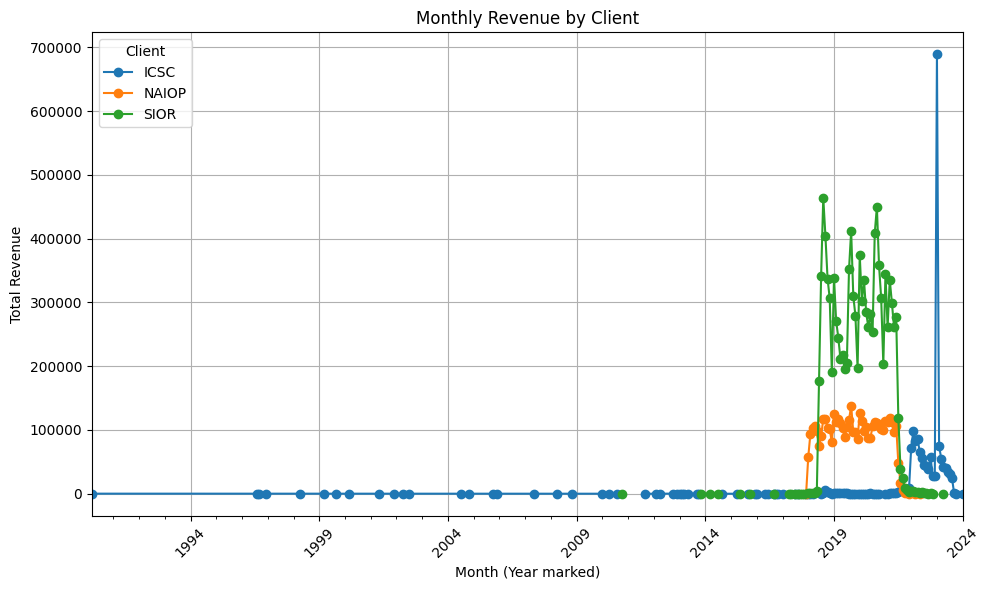

In [199]:
df['Month'] = df['EffectiveDate'].dt.to_period('M')
revenue_by_month = df.groupby(['Month', 'Client'])['Total'].sum().unstack()

# Plotting the data
plt.figure(figsize=(10, 6))
revenue_by_month.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())
plt.title('Monthly Revenue by Client')
plt.xlabel('Month (Year marked)')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend(title='Client')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/ss/yqcdmh2s71390cvwl12h39300000gn/T/ipykernel_65718/3785972217.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')


<Figure size 1000x600 with 0 Axes>

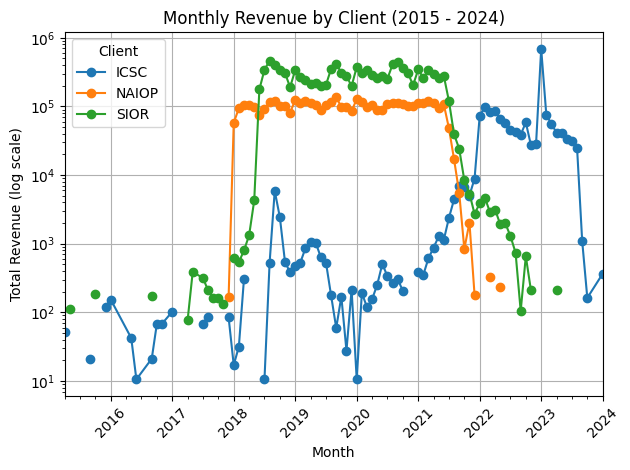

In [200]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with the necessary columns

# Filtering data by date and grouping by month and client
df_filtered = df[df['EffectiveDate'].dt.year >= 2015]
df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')
revenue_by_month_filtered = df_filtered.groupby(['Month', 'Client'])['Total'].sum().unstack()

# Plotting the data
plt.figure(figsize=(10, 6))
ax = revenue_by_month_filtered.plot(kind='line', marker='o', linestyle='-')
ax.set_yscale('log')  # Set the y-axis to a logarithmic scale

# Setting plot titles and labels
plt.title('Monthly Revenue by Client (2015 - 2024)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (log scale)')
plt.grid(True)
plt.legend(title='Client')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/ss/yqcdmh2s71390cvwl12h39300000gn/T/ipykernel_65718/1900747857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')


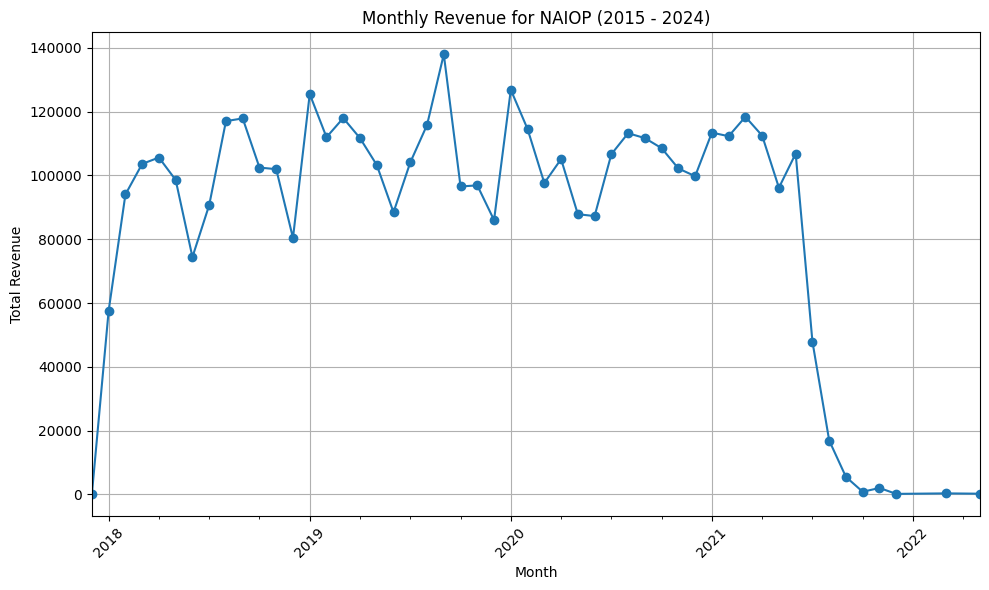

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the necessary columns

# Filtering data by client and date
df_filtered = df[(df['Client'] == 'NAIOP') & (df['EffectiveDate'].dt.year >= 2015)]
df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')

# Grouping data by month
revenue_by_month_naiop = df_filtered.groupby(['Month'])['Total'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
revenue_by_month_naiop.plot(kind='line', marker='o', linestyle='-')

# Setting plot titles and labels
plt.title('Monthly Revenue for NAIOP (2015 - 2024)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/ss/yqcdmh2s71390cvwl12h39300000gn/T/ipykernel_65718/612211600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_data['EffectiveDate'] = pd.to_datetime(client_data['EffectiveDate'])


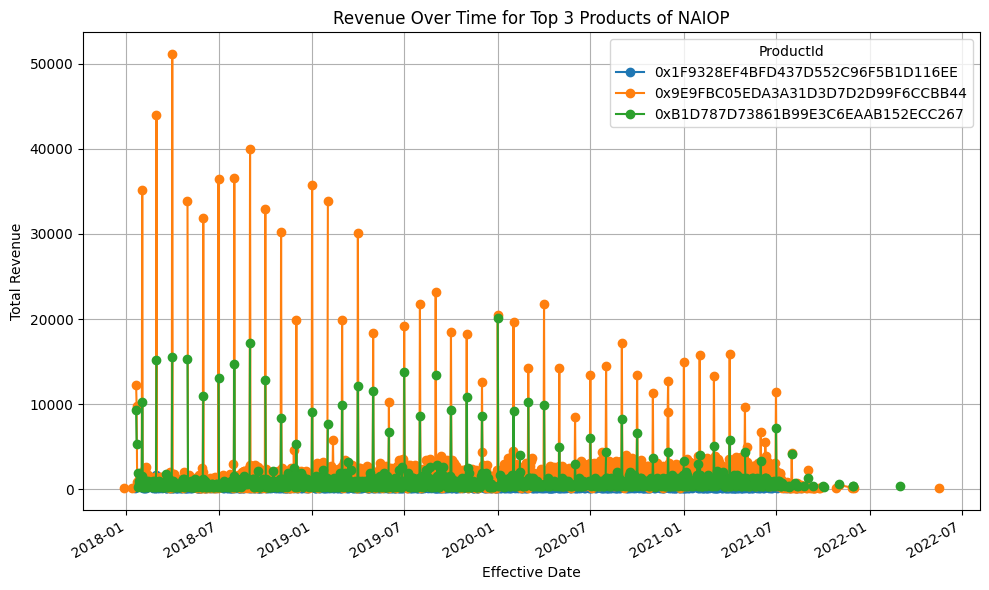

In [202]:
# Set your client of interest
client_of_interest = 'NAIOP'

client_data = df[df['Client'] == client_of_interest]
client_data['EffectiveDate'] = pd.to_datetime(client_data['EffectiveDate'])

top_products = client_data.groupby('ProductId')['Total'].sum().nlargest(3).index
top_product_data = client_data[client_data['ProductId'].isin(top_products)]
product_revenue_over_time = top_product_data.groupby(['EffectiveDate', 'ProductId']).agg({'Total': 'sum'}).unstack('ProductId')
product_revenue_over_time.columns = product_revenue_over_time.columns.droplevel()  # Drop multi-level column

# Plotting the time series data for the top 3 products
plt.figure(figsize=(10, 6))  # Set the figure size as needed
product_revenue_over_time.plot(kind='line', marker='o', ax=plt.gca())
plt.title(f'Revenue Over Time for Top 3 Products of {client_of_interest}')
plt.xlabel('Effective Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend(title='ProductId')
plt.tight_layout()
plt.show()

/var/folders/ss/yqcdmh2s71390cvwl12h39300000gn/T/ipykernel_65718/990851789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_data['EffectiveDate'] = pd.to_datetime(client_data['EffectiveDate'])


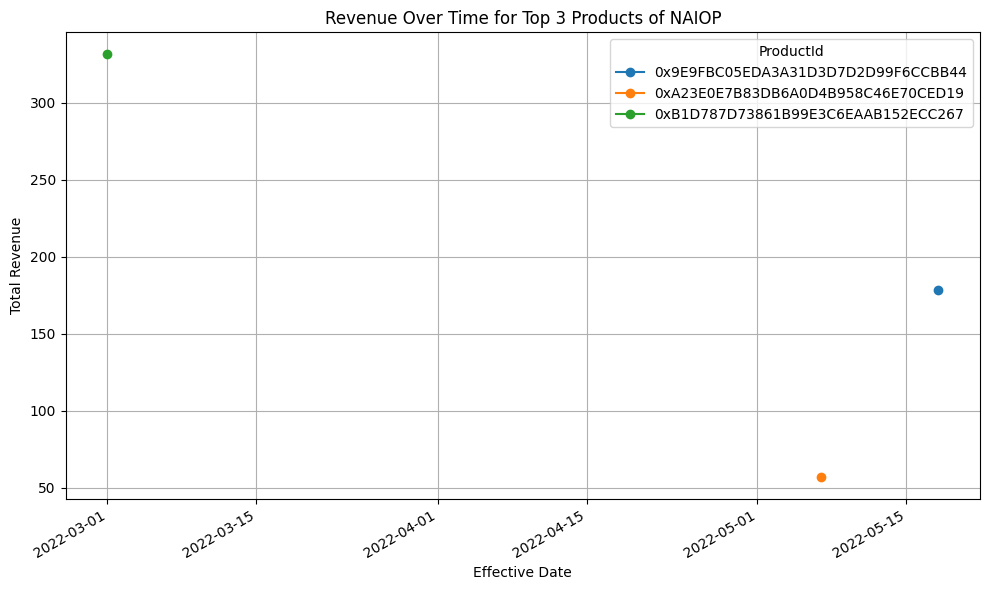

In [203]:
# Set your client of interest
client_of_interest = 'NAIOP'

client_data = df[(df['Client'] == client_of_interest) & (df['EffectiveDate'] >= '2022-01-01')]
client_data['EffectiveDate'] = pd.to_datetime(client_data['EffectiveDate'])

top_products = client_data.groupby('ProductId')['Total'].sum().nlargest(3).index
top_product_data = client_data[client_data['ProductId'].isin(top_products)]
product_revenue_over_time = top_product_data.groupby(['EffectiveDate', 'ProductId']).agg({'Total': 'sum'}).unstack('ProductId')
product_revenue_over_time.columns = product_revenue_over_time.columns.droplevel()

# Plotting the time series data for the top 3 products
plt.figure(figsize=(10, 6))  # Set the figure size as needed
product_revenue_over_time.plot(kind='line', marker='o', ax=plt.gca())
plt.title(f'Revenue Over Time for Top 3 Products of {client_of_interest}')
plt.xlabel('Effective Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend(title='ProductId')
plt.tight_layout()
plt.show()

In [204]:
# # Based on the provided code snippet, we will calculate the renewal rate for each product for client "NAIOP".

# # First, define the check_membership function as it's referenced in calculate_renewal_rate function.
# def check_membership(group):
#     group['Renewed'] = group['EffectiveDate'].shift(-1) > group['ExpireDate']
#     return group

# # Now define the function to calculate renewal rate per product for the client "NAIOP".
# def calculate_product_renewal_rate(client_df):
#     renewal_rates = {}
#     for product, product_group in client_df.groupby('ProductId'):
#         # Sort by ContactId and EffectiveDate within the product group
#         sorted_group = product_group.sort_values(by=['ContactId', 'EffectiveDate', 'ExpireDate'])
#         sorted_group['EffectiveDate'] = pd.to_datetime(sorted_group['EffectiveDate'])
#         sorted_group['ExpireDate'] = pd.to_datetime(sorted_group['ExpireDate'])
        
#         # Apply the check_membership function
#         renewals = sorted_group.groupby('ContactId', group_keys=False).apply(check_membership)
#         renewed_count = renewals['Renewed'].sum()  # Count of renewals for the product
#         total_count = product_group['ContactId'].nunique()  # Count of unique ContactIds for the product
        
#         # Calculate the renewal rate for the product
#         renewal_rate = renewed_count / total_count if total_count else 0
#         renewal_rates[product] = renewal_rate * 100  # Convert to percentage
#     return renewal_rates

# # Filter the dataframe for client "NAIOP" and calculate the renewal rate per product.
# naiop_df = df_mem[df_mem['Client'] == 'NAIOP']
# naiop_product_renewal_rates = calculate_product_renewal_rate(naiop_df)

# # Output the renewal rates per product for client "NAIOP".
# naiop_product_renewal_rates

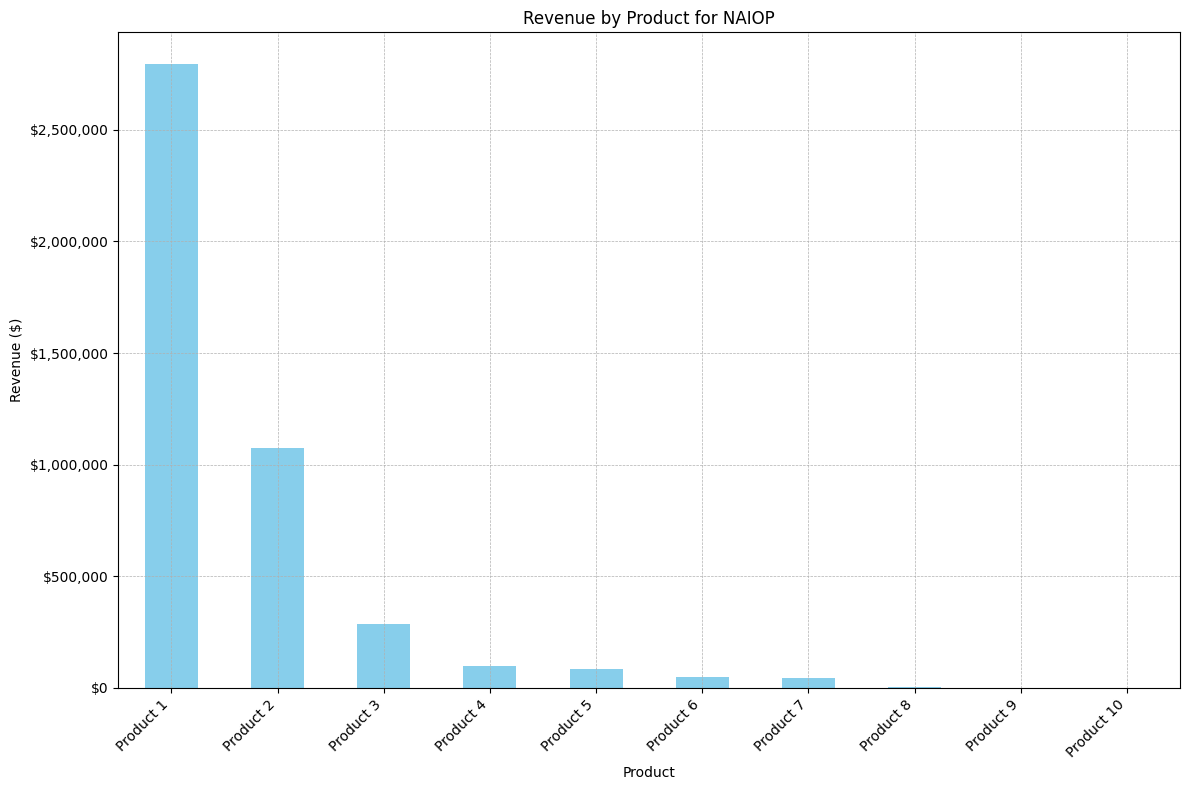

In [205]:
# Simulating the data for NAIOP
data = {
    'ProductId': [
        "0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44", 
        "0xB1D787D73861B99E3C6EAAB152ECC267", 
        "0x1F9328EF4BFD437D552C96F5B1D116EE", 
        "0xB794B776FB974C9B09BDE6A815EFFCD8", 
        "0xA23E0E7B83DB6A0D4B958C46E70CED19", 
        "0x85705D7BF13E936A6B07F7CC0047211F", 
        "0x0BCE80143CB901200D9A331930AA0315", 
        "0x896D76C40828972B7A92CA2BDBA6BE22", 
        "0x10AB8A62F22A93DFA334BE19E73A6832", 
        "0x859F45F9B7C86C38399DA51D19C7A5F6"
    ],
    'Total': [
        2.797043e+06, 1.073884e+06, 2.846097e+05, 
        9.956115e+04, 8.465310e+04, 4.799736e+04, 
        4.367439e+04, 3.118500e+03, 3.693600e+02, 
        2.916000e+01
    ]
}
df = pd.DataFrame(data)

# Update Product IDs to "Product 1", "Product 2", etc.
df['ProductId'] = ["Product " + str(i+1) for i in range(len(df))]

# Plotting the data
plt.figure(figsize=(12, 8))
ax = df.set_index('ProductId')['Total'].plot(kind='bar', color='skyblue')

# Setting the axis labels and title
plt.title('Revenue by Product for NAIOP')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')

# Formatting y-axis as currency
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

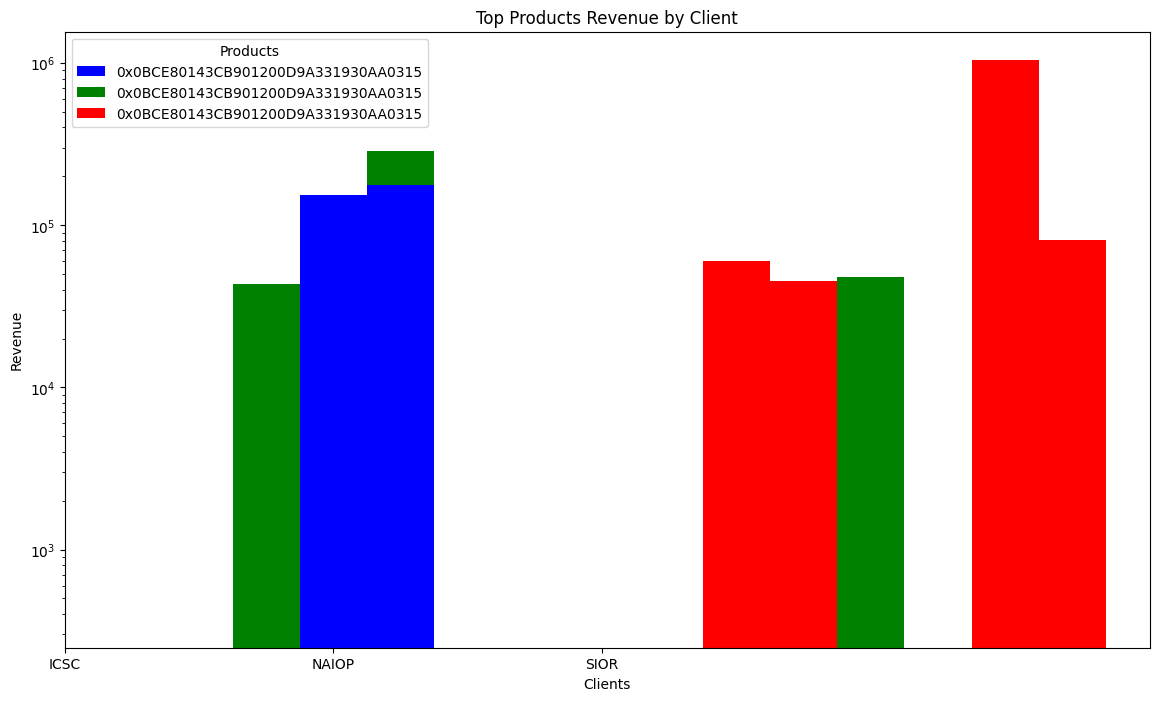

In [297]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data in a DataFrame
data = {
    'Client': ['ICSC'] * 5 + ['NAIOP'] * 10 + ['SIOR'] * 10,
    'ProductId': [
        "0x9E8B160226C9FE22A910C782CE5076E2", "0x8C19A547F4F2D76D4F47B8EFFB73F4F7", 
        "0x54F95A5E234DD10A3244A98632BA45CB", "0x5158A250E30F1FB4415D86DED2C8E0C5", "0xF5C0A1C9384C2E25E79BA1ABF5D9A037",
        "0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44", "0xB1D787D73861B99E3C6EAAB152ECC267", 
        "0x1F9328EF4BFD437D552C96F5B1D116EE", "0xB794B776FB974C9B09BDE6A815EFFCD8", "0xA23E0E7B83DB6A0D4B958C46E70CED19", 
        "0x85705D7BF13E936A6B07F7CC0047211F", "0x0BCE80143CB901200D9A331930AA0315", "0x896D76C40828972B7A92CA2BDBA6BE22", 
        "0x10AB8A62F22A93DFA334BE19E73A6832", "0x859F45F9B7C86C38399DA51D19C7A5F6",
        "0x9E8B160226C9FE22A910C782CE5076E2", "0xF5C0A1C9384C2E25E79BA1ABF5D9A037", 
        "0x83328A9B5BCBD66B31C8B882E78C7B0F", "0xBC0C8546EF1FC064C277B3CEECF1B68E", "0xD109AC74DF282488EFD1DD7621A847D2",
        "0xBB166FEFF34B74FEF81127259160C93A", "0x847D827DAC4CED82AE7907495A7399C9", "0x2C5EAF03FB31E4EB10D8CB3786C0DF00", "0x941CFE1F75F9BF7E4577700E2C16D7CA", "0x3A6A1693FA5A8298B28EF588CFEF866B"
    ],
    'Total': [
        1.122092e+06, 1.972465e+05, 1.760362e+05, 1.528739e+05, 1.076415e+05,
        2.797043e+06, 1.073884e+06, 2.846097e+05, 9.956115e+04, 8.465310e+04,
        4.799736e+04, 4.367439e+04, 3.118500e+03, 3.693600e+02, 2.916000e+01,
        6.711268e+06, 1.954636e+06, 1.046778e+06, 5.484348e+05, 1.038487e+05,
        8.203861e+04, 8.146899e+04, 6.009390e+04, 5.525010e+04, 4.496553e+04
    ]
}

df = pd.DataFrame(data)

# We need to restructure this data for plotting
# Pivot the data for easier plotting
pivot_df = df.pivot_table(values='Total', index='ProductId', columns='Client', aggfunc='sum')

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 8))

# We need to find the positions for the groups
client_list = df['Client'].unique()
x = np.arange(len(client_list))
width = 0.25  # the width of the bars

colors = {'ICSC': 'blue', 'NAIOP': 'green', 'SIOR': 'red'}

# Plot each row
for i, product in enumerate(pivot_df.index[:10]):
    for j, client in enumerate(client_list):
        ax.bar(x[j] + width*i, pivot_df.loc[product, client] if product in pivot_df.index and client in pivot_df.columns else 0, 
               width, label=f'{product}' if i == 0 else "", color=colors[client])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Clients')
ax.set_ylabel('Revenue')
ax.set_title('Top Products Revenue by Client')
ax.set_xticks(x + width)
ax.set_xticklabels(client_list)
ax.legend(title='Products')
ax.set_yscale('log')

plt.show()

- do products show every year, or is it just new maybe? (maybe mark new on the first entry)
- track annual sales of products, visualize (make a life cycle), to see trends over time

To be continued for products:
- which products perform the best per client
- (done) what percentage of the sales do products make of the client, which ones are the most popular?
- Cost against items bought (graph)

In [206]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from datetime import datetime

# Filter the data for NAIOP and for the desired date range
df_naiop = df_mem[(df_mem['Client'] == 'NAIOP') &
                  (df_mem['EffectiveDate'].dt.year >= 2018) &
                  (df_mem['EffectiveDate'] < datetime(2021, 7, 1))]

df_naiop.head()

,ContactId,ClientId,Client,ProductId,ProductType,EffectiveDate,ExpireDate,Total
133044,Member 54164,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x859F45F9B7C86C38399DA51D19C7A5F6,Membership,2020-09-01,2021-05-05,9.72
133045,Member 54164,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x859F45F9B7C86C38399DA51D19C7A5F6,Membership,2020-09-01,2021-08-31,9.72
133059,Member 54166,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44,Membership,2021-06-28,2022-06-27,178.20
133062,Member 54167,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x0BCE80143CB901200D9A331930AA0315,Membership,2021-06-29,2022-06-28,58.32
133063,Member 54168,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44,Membership,2021-06-29,2022-06-28,178.20


In [226]:
from scipy.stats import ttest_ind

top_naiop = 2.797043e+06 + 1.073884e+06 + 2.846097e+05 + 9.956115e+04 + 8.465310e+04
avg_top_naiop = (top_naiop / 5)
rest_naiop = (4.434940e+06 - top_naiop)
num_rest_naiop = df_mem[df_mem['Client'] == 'NAIOP']['ProductId'].nunique() - 5
avg_rest_naiop = (rest_naiop / num_rest_naiop)
std_dev_naiop = np.std(df_mem[df_mem['Client'] == 'NAIOP']['Total'])
# sample_size_naiop = df_mem[df_mem['Client'] == 'NAIOP'].count()
sample_size_naiop = 24184
naiop_samples_t = np.random.normal(avg_top_naiop, std_dev_naiop, sample_size_naiop)
naiop_samples_r = np.random.normal(avg_rest_naiop, std_dev_naiop, sample_size_naiop)
t_stat_naiop, p_value_naiop = ttest_ind(naiop_samples_t, naiop_samples_r)
print(f"T-statistic: {t_stat_naiop}, P-value: {p_value_naiop}")
alpha = 0.05
if p_value_naiop < alpha:
    print("There is a statistically significant difference between the top 5 products and the rest.")
else:
    print("There is no statistically significant difference between the top 5 products and the rest.")

T-statistic: 1397850.3112359, P-value: 0.0
There is a statistically significant difference between the top 5 products and the rest.


In [289]:
import pandas as pd
from scipy.stats import ttest_ind

# Filter data for NAIOP
naiop_data = df_mem[df_mem['Client'] == 'NAIOP']
# Aggregate revenue by product
product_revenue = naiop_data.groupby('ProductId')['Total'].sum().reset_index()
# Sort products by total revenue in descending order
product_revenue_sorted = product_revenue.sort_values(by='Total', ascending=False)
# Get the top 5 products
top_3_revenue = product_revenue_sorted.head(3)['Total']
# Get the revenue for the rest of the products
rest_revenue = product_revenue_sorted.tail(len(product_revenue_sorted) - 3)['Total']
print("COUNT: ", rest_revenue.count())
# Perform the two-sample t-test between the top 5 products and the rest
t_stat, p_value = ttest_ind(top_3_revenue, rest_revenue)  # Use equal_var=False if you assume variances are unequal
print(f"T-statistic: {t_stat}, P-value: {p_value}")
# Interpretation based on the p-value
alpha = 0.05
if p_value < alpha:
    print("The average revenue from the top 3 products is significantly different from the rest.")
else:
    print("There is no significant difference in average revenue between the top 3 products and the rest.")


# 11  NAIOP  0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44  2.797043e+06
# 13  NAIOP  0xB1D787D73861B99E3C6EAAB152ECC267  1.073884e+06
# 7   NAIOP  0x1F9328EF4BFD437D552C96F5B1D116EE  2.846097e+05
# 14  NAIOP  0xB794B776FB974C9B09BDE6A815EFFCD8  9.956115e+04
# 12  NAIOP  0xA23E0E7B83DB6A0D4B958C46E70CED19  8.465310e+04
# 8   NAIOP  0x85705D7BF13E936A6B07F7CC0047211F  4.799736e+04
# 5   NAIOP  0x0BCE80143CB901200D9A331930AA0315  4.367439e+04
# 10  NAIOP  0x896D76C40828972B7A92CA2BDBA6BE22  3.118500e+03
# 6   NAIOP  0x10AB8A62F22A93DFA334BE19E73A6832  3.693600e+02
# 9   NAIOP  0x859F45F9B7C86C38399DA51D19C7A5F6  2.916000e+01


COUNT:  7
T-statistic: 3.0299752316700785, P-value: 0.016310030930518717
The average revenue from the top 3 products is significantly different from the rest.


In [291]:
# Filter data for ICSC
naiop_data = df_mem[df_mem['Client'] == 'ICSC']
# Aggregate revenue by product
product_revenue = naiop_data.groupby('ProductId')['Total'].sum().reset_index()
# Sort products by total revenue in descending order
product_revenue_sorted = product_revenue.sort_values(by='Total', ascending=False)
# Get the top 5 products
top_3_revenue = product_revenue_sorted.head(3)['Total']
# Get the revenue for the rest of the products
rest_revenue = product_revenue_sorted.tail(len(product_revenue_sorted) - 3)['Total']
print("COUNT: ", rest_revenue.count())
# Perform the two-sample t-test between the top 5 products and the rest
t_stat, p_value = ttest_ind(top_3_revenue, rest_revenue)  # Use equal_var=False if you assume variances are unequal
print(f"T-statistic: {t_stat}, P-value: {p_value}")
# Interpretation based on the p-value
alpha = 0.05
if p_value < alpha:
    print("The average revenue from the top 3 products is significantly different from the rest.")
else:
    print("There is no significant difference in average revenue between the top 3 products and the rest.")

# 3    ICSC  0x9E8B160226C9FE22A910C782CE5076E2  1.122092e+06
# 2    ICSC  0x8C19A547F4F2D76D4F47B8EFFB73F4F7  1.972465e+05
# 1    ICSC  0x54F95A5E234DD10A3244A98632BA45CB  1.760362e+05
# 0    ICSC  0x5158A250E30F1FB4415D86DED2C8E0C5  1.528739e+05
# 4    ICSC  0xF5C0A1C9384C2E25E79BA1ABF5D9A037  1.076415e+05

COUNT:  2
T-statistic: 0.9136848937676764, P-value: 0.42825418853886055
There is no significant difference in average revenue between the top 3 products and the rest.


In [290]:
# Filter data for SIOR
naiop_data = df_mem[df_mem['Client'] == 'SIOR']
# Aggregate revenue by product
product_revenue = naiop_data.groupby('ProductId')['Total'].sum().reset_index()
# Sort products by total revenue in descending order
product_revenue_sorted = product_revenue.sort_values(by='Total', ascending=False)
# Get the top 5 products
top_3_revenue = product_revenue_sorted.head(19)['Total']
# Get the revenue for the rest of the products
rest_revenue = product_revenue_sorted.tail(len(product_revenue_sorted) - 19)['Total']
print("COUNT: ", rest_revenue.count())
# Perform the two-sample t-test between the top 5 products and the rest
t_stat, p_value = ttest_ind(top_3_revenue, rest_revenue)  # Use equal_var=False if you assume variances are unequal
print(f"T-statistic: {t_stat}, P-value: {p_value}")
# Interpretation based on the p-value
alpha = 0.05
if p_value < alpha:
    print("The average revenue from the top 19 products is significantly different from the rest.")
else:
    print("There is no significant difference in average revenue between the top 19 products and the rest.")

# 44   SIOR  0x9E8B160226C9FE22A910C782CE5076E2  6.711268e+06
# 63   SIOR  0xF5C0A1C9384C2E25E79BA1ABF5D9A037  1.954636e+06
# 31   SIOR  0x83328A9B5BCBD66B31C8B882E78C7B0F  1.046778e+06
# 48   SIOR  0xBC0C8546EF1FC064C277B3CEECF1B68E  5.484348e+05
# 54   SIOR  0xD109AC74DF282488EFD1DD7621A847D2  1.038487e+05
# 47   SIOR  0xBB166FEFF34B74FEF81127259160C93A  8.203861e+04
# 32   SIOR  0x847D827DAC4CED82AE7907495A7399C9  8.146899e+04
# 20   SIOR  0x2C5EAF03FB31E4EB10D8CB3786C0DF00  6.009390e+04
# 38   SIOR  0x941CFE1F75F9BF7E4577700E2C16D7CA  5.525010e+04
# 22   SIOR  0x3A6A1693FA5A8298B28EF588CFEF866B  4.496553e+04

COUNT:  32
T-statistic: 2.131815871806128, P-value: 0.03816783960567372
The average revenue from the top 3 products is significantly different from the rest.


/var/folders/ss/yqcdmh2s71390cvwl12h39300000gn/T/ipykernel_65718/1969469279.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')


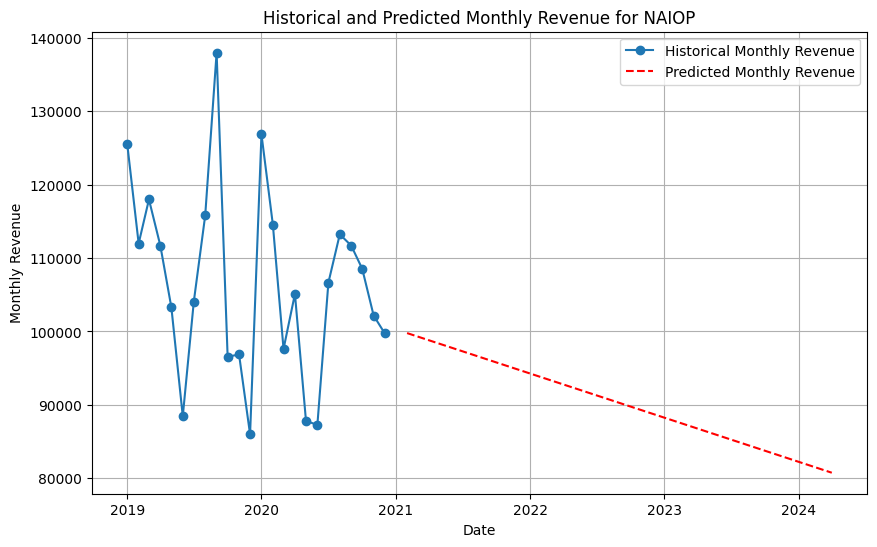

In [292]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

# Assuming 'df_mem' is your DataFrame with the necessary columns for membership data

# Filtering data by client and date
df_filtered = df_mem[(df_mem['Client'] == 'NAIOP') & (df_mem['EffectiveDate'].dt.year >= 2019)]
df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')

# Grouping data by month to calculate monthly revenue
revenue_by_month_naiop = df_filtered.groupby(['Month'])['Total'].sum().reset_index()
revenue_by_month_naiop['Month'] = revenue_by_month_naiop['Month'].dt.to_timestamp()

# Fit the linear regression model to data up to mid-2021
training_data = revenue_by_month_naiop[revenue_by_month_naiop['Month'] < pd.Timestamp('2021-01-01')]
X_train = np.array([d.toordinal() for d in training_data['Month']]).reshape(-1, 1)
y_train = training_data['Total'].values

model = LinearRegression()
model.fit(X_train, y_train)

# Generate dates from mid-2021 to the present for predictions
predict_dates = pd.date_range(start='2021-01-01', end=pd.to_datetime("today"), freq='M')
predict_dates_ordinal = np.array([d.toordinal() for d in predict_dates]).reshape(-1, 1)

# Predict the monthly revenue
predicted_sales = model.predict(predict_dates_ordinal)

# Plotting historical data up to mid-2021
plt.figure(figsize=(10, 6))
plt.plot(training_data['Month'], training_data['Total'], label='Historical Monthly Revenue', marker='o')

# Plotting predicted monthly revenue from mid-2021 to present
plt.plot(predict_dates, predicted_sales, label='Predicted Monthly Revenue', linestyle='--', color='red')

# Set the title and labels
plt.title('Historical and Predicted Monthly Revenue for NAIOP')
plt.xlabel('Date')
plt.ylabel('Monthly Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

/var/folders/ss/yqcdmh2s71390cvwl12h39300000gn/T/ipykernel_65718/284538614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')


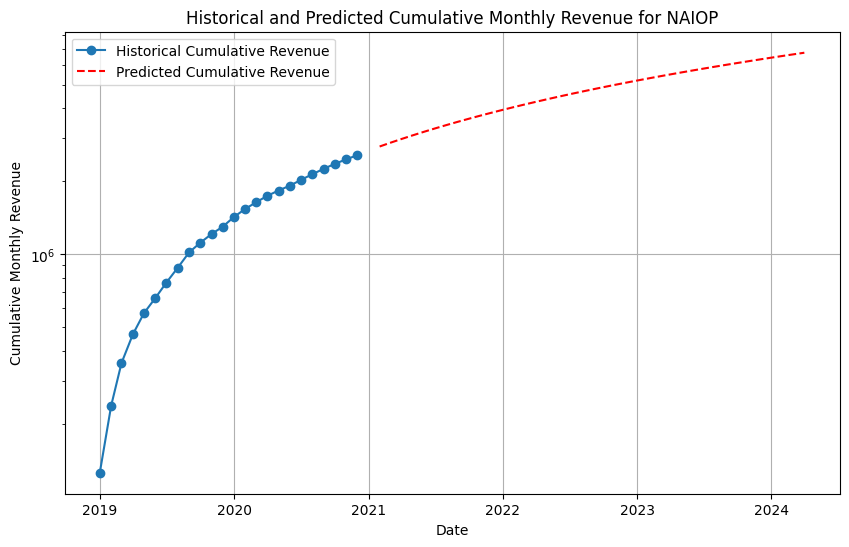

In [294]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

# Assuming 'df_mem' is your DataFrame with the necessary columns for membership data

# Filtering data by client and date
df_filtered = df_mem[(df_mem['Client'] == 'NAIOP') & (df_mem['EffectiveDate'].dt.year >= 2019)]
df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')

# Grouping data by month to calculate monthly revenue
revenue_by_month_naiop = df_filtered.groupby(['Month'])['Total'].sum().reset_index()
revenue_by_month_naiop['Month'] = revenue_by_month_naiop['Month'].dt.to_timestamp()

# Calculating cumulative revenue
revenue_by_month_naiop['Cumulative Total'] = revenue_by_month_naiop['Total'].cumsum()

# Fit the linear regression model to data up to mid-2021 using cumulative revenue
training_data = revenue_by_month_naiop[revenue_by_month_naiop['Month'] < pd.Timestamp('2021-01-01')]
X_train = np.array([d.toordinal() for d in training_data['Month']]).reshape(-1, 1)
y_train = training_data['Cumulative Total'].values

model = LinearRegression()
model.fit(X_train, y_train)

# Generate dates from mid-2021 to the present for predictions
predict_dates = pd.date_range(start='2021-01-01', end=pd.to_datetime("today"), freq='M')
predict_dates_ordinal = np.array([d.toordinal() for d in predict_dates]).reshape(-1, 1)

# Predict the cumulative monthly revenue
predicted_sales = model.predict(predict_dates_ordinal)

# Plotting historical cumulative data up to mid-2021
plt.figure(figsize=(10, 6))
plt.plot(training_data['Month'], training_data['Cumulative Total'], label='Historical Cumulative Revenue', marker='o')

# Plotting predicted cumulative revenue from mid-2021 to present
plt.plot(predict_dates, predicted_sales, label='Predicted Cumulative Revenue', linestyle='--', color='red')

# Set the title and labels
plt.title('Historical and Predicted Cumulative Monthly Revenue for NAIOP')
plt.xlabel('Date')
plt.ylabel('Cumulative Monthly Revenue')
plt.legend()
plt.grid(True)

plt.gca().set_yscale('log')

# Display the plot
plt.show()
